In [6]:
%matplotlib inline
import torch
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
from torchvision.io import image
from torchvision.transforms.functional import to_pil_image

In [7]:
img_catdog = Path('../data/img/catdog.jpg')

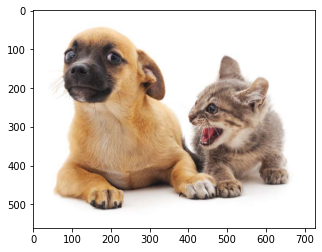

In [8]:
img = image.read_image(img_catdog.as_posix())
img = to_pil_image(img)
plt.imshow(img)

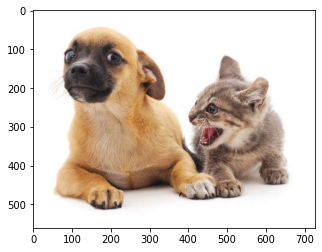

In [9]:
img = Image.open(img_catdog)
plt.imshow(img);

In [4]:
def box_corner_to_center(boxes):
    """从（左上x，左上y，右下x，右下y）转换到（中间x，中间y，宽度，高度）"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=1)
    return boxes


def box_center_to_corner(boxes):
    """从（中间x，中间y，宽度，高度）转换到（左上x，左上y，右下x，右下y）"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=1)
    return boxes

In [5]:
# 对角边框
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]

In [6]:
# 验证转换
boxes = torch.tensor((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

In [9]:
def bbox_to_rect(bbox, color):
    # 对角边框（左上x，左上y，右下x，右下y）
    # 绘制bbox
    return plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

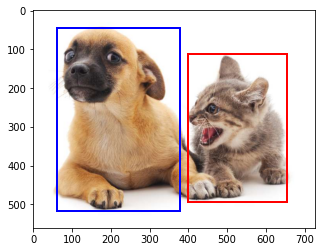

In [10]:
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));